# <font color="purple"><h3 align="center"> Implement LinearRegression winequality-red Data set</h3></font>

In [1]:
import pandas as pd


In [2]:
wine_data=pd.read_csv("winequality-red.csv" , sep=";")
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
X=wine_data.drop("quality" , axis=1).values
Y=wine_data["quality"].values

In [4]:
X_fixedacidity=X[:,0]
X_fixedacidity

array([7.4, 7.8, 7.8, ..., 6.3, 5.9, 6. ])

In [5]:
X_fixedacidity=X_fixedacidity.reshape(-1,1)
X_fixedacidity.shape

(1599, 1)

In [6]:
import matplotlib.pyplot as plt

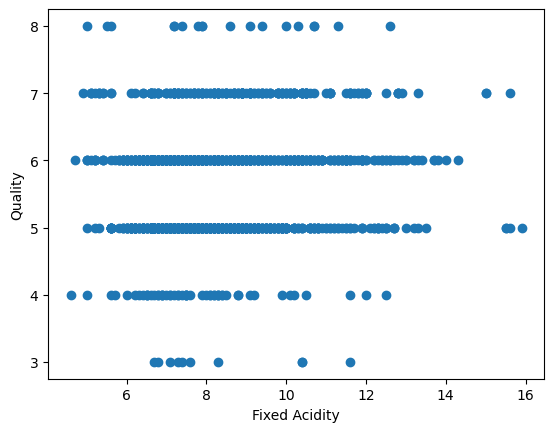

In [7]:
plt.scatter(X_fixedacidity,Y)
plt.xlabel("Fixed Acidity")
plt.ylabel("Quality")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

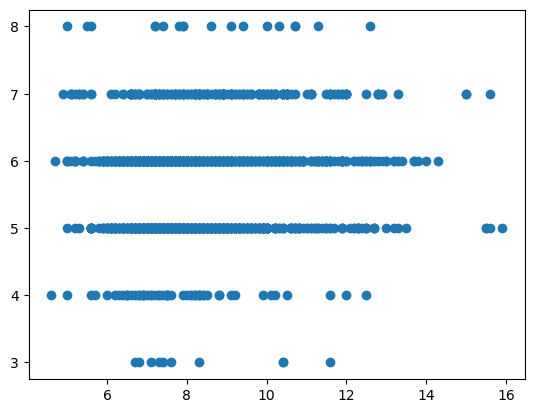

In [9]:
reg=LinearRegression()
reg.fit(X_fixedacidity, Y)
test_perdicate=reg.predict(X_fixedacidity)
plt.scatter(X_fixedacidity, Y)

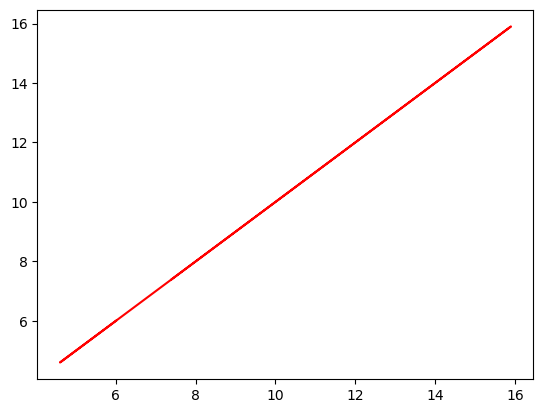

In [10]:
plt.plot(X_fixedacidity, X_fixedacidity,color="red")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test=train_test_split(X,Y, test_size=0.3 , random_state=123)
X_train

array([[14.        ,  0.41      ,  0.63      , ...,  3.01      ,
         0.81      , 10.8       ],
       [ 7.2       ,  0.61      ,  0.08      , ...,  3.25      ,
         0.51      ,  9.4       ],
       [ 7.4       ,  0.785     ,  0.19      , ...,  3.16      ,
         0.52      ,  9.56666667],
       ...,
       [ 8.2       ,  0.24      ,  0.34      , ...,  3.22      ,
         0.94      , 10.9       ],
       [ 6.7       ,  0.48      ,  0.02      , ...,  3.1       ,
         0.53      ,  9.7       ],
       [ 6.6       ,  0.56      ,  0.14      , ...,  3.42      ,
         0.62      , 11.7       ]])

In [12]:
multierg=LinearRegression()
multierg.fit(X_train, Y_train)
test_perdict=multierg.predict(x_test)

In [13]:
from sklearn.metrics import mean_squared_error , r2_score

In [14]:
res=mean_squared_error(test_perdict,y_test)
res

0.42295656912236546

In [15]:
r2=r2_score(test_perdict, y_test)
r2

-0.9330150290810848

In [16]:
from sklearn.linear_model import Lasso

In [17]:
score=[]
for alpha in [0.01 , 10.0, 1.0, 20.0, 50.0]:
    lasso=Lasso(alpha=alpha)
    lasso.fit(X_train, Y_train)
    lasso_p=lasso.predict(x_test)
    score.append(lasso.score(x_test,y_test))
print(score)

[0.3116914742676363, -0.001210016734667807, 0.024517505533790063, -0.001210016734667807, -0.001210016734667807]


In [18]:
%matplotlib inline

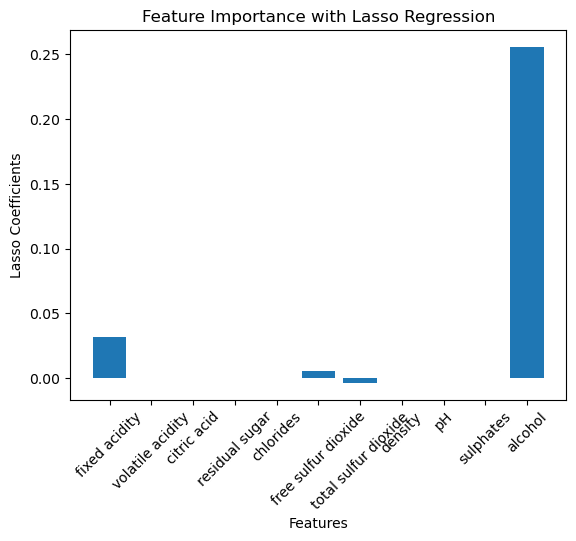

In [19]:
lasso=Lasso(alpha=0.1)
names=wine_data.drop("quality" , axis=1).columns
lasso_coef=lasso.fit(X,Y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Lasso Coefficients")
plt.title("Feature Importance with Lasso Regression")
plt.show()